In [1]:
%matplotlib inline
from matplotlib.animation import FuncAnimation
from matplotlib.patches import Rectangle, Polygon
import numpy as np
import matplotlib.pyplot as plt
import math
from IPython.display import HTML
import json


In [2]:
input_directory = 'output_7'

In [3]:
with open(input_directory + '/args.json') as f:
        params = json.load(f)
n_particles = params['n_particles']
n_dimensions = params['n_dimensions']
n_steps = params['n_steps']
batch_size = params['batch_size']



In [5]:
all_positions = []
for i in range(int(n_steps/batch_size)):
#for i in range(20):
    positions = np.load("{}/positions_{}.npy".format(input_directory,i))
    all_positions.append(positions)
all_positions = np.concatenate(all_positions,axis=0)

In [6]:
box_vectors = np.asarray([[1.0*math.sqrt(n_particles),0],[0,1.0*math.sqrt(n_particles)]])

In [7]:
def parallelogram_vertices(box_vectors):
    return np.array([[0, 0], box_vectors[0], box_vectors[0] + box_vectors[1], box_vectors[1]])

def initialize_plot(box_vectors,initial_positions,sizes):
    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1], frameon=False)
    ax.set_xlim(-0.5,box_vectors[0][0]+0.5)
    ax.set_ylim(-0.5,box_vectors[1][1]+0.5)
    boundary_vertices = parallelogram_vertices(box_vectors)
    polygon = Polygon(xy=boundary_vertices, fill=False,linewidth=1, edgecolor='r')
    patch = ax.add_patch(polygon)
    #remove the last row from positions[0] because it is the size of the particles

    poss=initial_positions.reshape([n_particles,n_dimensions])
    R_plt=np.asarray(poss)
    sizes = 3000.0*sizes
    scat=ax.scatter(R_plt[:,0],R_plt[:,1],s=sizes)
    return fig, scat, ax, polygon

def update_plot(frame_number):
    #the variables accessed (scat and polygon), need to be defined in the global name space
    R_plt=all_positions[frame_number][:,:2].reshape([n_particles,n_dimensions])
    sizes=3000*all_positions[frame_number][:,2]
    scat.set_offsets(R_plt)
    #size = 3000.0-20.0*frame_number
    #scat.set_sizes([size for x in range(n_particles)])
    scat.set_sizes(sizes)
    vertices = parallelogram_vertices(box_vectors)
    polygon.set_xy(vertices)
    #ax.scatter(R_plt[:,0],R_plt[:,1],s=3000.0)


In [14]:
all_positions[100][:,2]

array([0.931, 0.931, 0.931, 0.931, 0.931, 0.931, 0.931, 0.931, 0.931,
       0.931, 0.931, 0.931, 0.931, 0.931, 0.931, 0.931], dtype=float32)

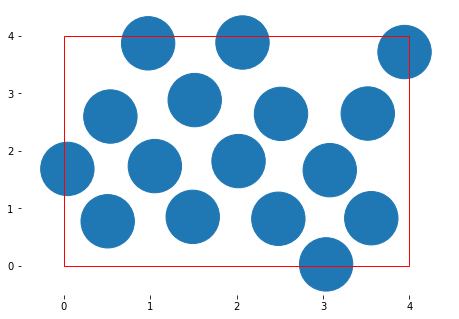

In [8]:
fig, scat, ax, polygon = initialize_plot(box_vectors,all_positions[0][:,:2],all_positions[0][:,2])

In [9]:
animation = FuncAnimation(fig, update_plot, interval=40, frames=20)

In [10]:
HTML(animation.to_jshtml())

In [42]:
0.5*box_vectors

array([[2., 0.],
       [0., 2.]])

In [11]:
all_positions.shape

(100000, 16, 3)